In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import quad,odeint,solve_ivp
from scipy import linalg
#from scipy.optimize import fsolve
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 16})  # set font size for plots

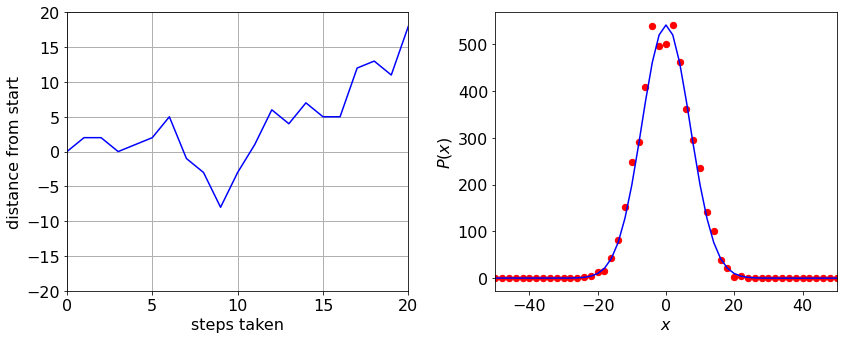

In [2]:
# algorithm 6. 1D random walk 
plt.rcParams.update({'font.size': 16})  # set font size for plots
fig1=plt.figure(figsize=(12,5))
ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)

n    = 501
steps= 50
reps = 5000
prob = np.zeros(n) 
xdata= np.zeros(n)
mdata= np.zeros(reps)
c = ( n - 1 )//2
s = 0
for L in range(reps):
    m = 0   
    for j in range(steps):
        r = np.random.ranf() 
        if r < 0.50 :
            m = m + 1 
        else:
            m = m - 1 
        pass
    
    prob[c + m//2] = prob[c + m//2] + 1
    s = s + m//2
    mdata[L]=  s
    pass # end of ‘for L ..reps’ forifrom1tondo #xvalues

mdata[0] = 0
for i in range(n):
    xdata[i]= (-c + i )*2             # only even x numbers

ax1.plot(xdata, max(prob)*np.exp(-xdata**2/(2*steps) ) ,color='blue')
ax1.scatter(xdata,prob,s=40,color='red',alpha=1)
ax1.set_xlim([-50,50])
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$P(x) $')
           
ax0.plot(mdata[0:50],color='blue')
ax0.grid(True,linewidth=1)
ax0.set_xlim([0,20])
ax0.set_ylim([-20,20])
ax0.set_xlabel('steps taken')
ax0.set_ylabel('distance from start')
    
plt.tight_layout()

#plt.savefig('monte-carlo-fig10.png')
plt.show()

In [3]:
# Algorithm 7  least squares and monte carlo calc of decay

def func(x, a, b):
    return a * np.exp(-x/b) 

events= 200000
bins = 500
maxt = 500.0
tau  = 50.0  # ns
fcount= np.zeros(bins,dtype=int)
dtime = np.zeros(bins,dtype=float)
tau_val=np.zeros(events,dtype=float)

for i in range(bins):
    dtime[i]= maxt*(i+1/2)/bins
    pass

for i in range(events):
    p = np.random.ranf()                      # random 0..1
    t = -tau*np.log(p)
   
    indx = int(np.round(bins*t/maxt) )
    tau_val[i]=t
    if indx < bins:
        fcount[indx] = fcount[indx] + 1
    pass

p3, pcov = curve_fit( func, dtime, fcount, p0 = [ 5000, 60.0  ] )


fig1=plt.figure(figsize=(12,5))
ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)
plt.rcParams.update({'font.size': 16})  # set font size for plots


ax1.semilogy( dtime, fcount ,marker='o',linestyle='',markersize=2,color='blue')
ax1.semilogy( dtime, func(dtime,p3[0],p3[1] ), color='red')	

ax1.set_ylim([1,1.5*max(fcount)])
ax1.set_xlim([0,maxt])
ax1.set_xlabel('time /ns',fontsize = 16)
ax1.set_ylabel('signal (counts)',fontsize = 16)
ax1.set_ylim([1,1.1e4])

ax0.plot(tau_val,color='black',linewidth=1)
ax0.set_xlim([0,500])
ax0.set_ylim([0,400])
ax0.set_xlabel('Event #')
ax0.set_ylabel('lifetime /ns')

plt.tight_layout()

#plt.savefig('monte-carlo-fig11.png')

plt.show()


NameError: name 'curve_fit' is not defined

In [6]:
# metropolis  algorithm 8 harmonic oscillator

#n = 20000                         # number of samples
def Hosc(n):
    deltax= 0.4                       # max displacement
    #kB    = 1.38e-5 #   in kg/nm62/s^2/K  0.1                       # initial thermal energy
    nm    = 1e-9
    #T     = 300.0
    kBT   = kB*T
    Etot  = 0.0                       # initial <E>
    E2tot = 0.0
    xtot=0.0
    x2tot=0.0
    k     = 10.0 # force constant 
    V = lambda x: 0.5*k* x**2               # potential energy PE # first guess of x
    x1= 0.0
    E1= V(x1)                         # first guess of PE 
    for i in range(n):                # start loop step(2)
        
        x2 = x1 + (np.random.ranf()-0.5)*deltax      #new x position 
        E2 = V(x2)                                   # new PE
        DeltaE= E2 - E1                              # energy difference
        # next line is Metropolis part(3) and (4)in algorithm
        if DeltaE <= 0.0 or np.exp(-DeltaE/kBT) > np.random.ranf() :
            x1= x2                    # save new configuration 
            E1= E2                    # save new energy
            pass
        Etot = Etot + E1              # always add to total 
        E2tot= E2tot + E1**2          # add to total <E^2>
        xtot = xtot + x1
        x2tot = x2tot +x1**2
        pass
    Eav = nm**2*Etot/n;                     # average step (5)
    E2av= nm**4*E2tot/n;
    stdev= np.sqrt(  (E2av - Eav**2)/(n-1)   );
    CV= (E2av-Eav**2)/(kB*T**2)/nm**2
    xav = nm*xtot/n
    x2av= nm**2*x2tot/n
    return Eav,E2av,stdev,CV,xav,x2av

kB    = 1.38e-5 #   in kg/nm62/s^2/K  0.1                       # initial thermal energy
T     = 300.0
print(kB*T)
maxn= 100000


nlist =[100,200,500,1000,2000,5000,10000,20000,50000,100000]
Eval=[0 for i in range(len(nlist))]
Sdval=[0 for i in range(len(nlist))]
mval=[0 for i in range(len(nlist))]
for k, m0 in enumerate(nlist):

    m = int(np.round(maxn/m0)+1 )
    print('k,m,m0',k, m,m0)
    
    valE=0
    valSD=0.0
    for i in range(m):
        Eav, E2av, stdev, CV,temp,temp = Hosc( m0 )
        #print('i,m E sd', i,n, m, Eav*1e21, stdev*1e21 )
        valE = valE + Eav*1e21
        valSD= valSD + stdev*1e21
    print( m, m0, valE/m, valSD/m )
    Eval[k]=valE/m
    Sdval[k]=valSD/m
    mval[k]=m0
print('finished')

0.00414
k,m,m0 0 1001 100
1001 100 1.9245684133516152 0.25083273084856744
k,m,m0 1 501 200
501 200 1.9798307697572926 0.18909745695978258
k,m,m0 2 201 500
201 500 2.0589269745151566 0.12762771212231902
k,m,m0 3 101 1000
101 1000 2.0729673386936702 0.0913310224706445
k,m,m0 4 51 2000
51 2000 1.9926439008160188 0.06246359715425317
k,m,m0 5 21 5000
21 5000 2.081317166186314 0.04191290731201401
k,m,m0 6 11 10000
11 10000 2.086226557555868 0.029787263909476
k,m,m0 7 6 20000
6 20000 2.068029418046985 0.02057713438197518
k,m,m0 8 3 50000
3 50000 2.045369055375889 0.013035026000249342
k,m,m0 9 2 100000
2 100000 2.0866917140214385 0.00928955927009217
finished


[100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]


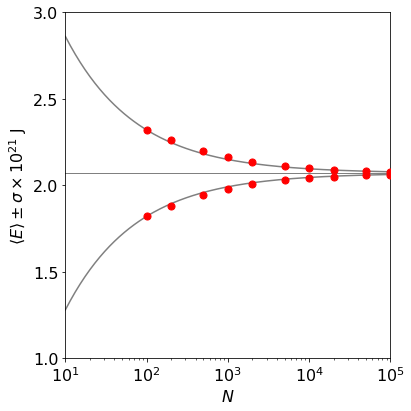

In [10]:
fig1= plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 16})  # set font size for plots
kk=1.38e-2*T/2
print(mval)

xm=np.logspace(1,5,200)
plt.plot(xm[:],1.38e-2*T/2+2.5/np.sqrt(xm[:]),color='grey')
plt.plot(xm[:],1.38e-2*T/2-2.5/np.sqrt(xm[:]),color='grey')

plt.scatter(mval[:],[kk+ Sdval[i] for i in range(len(Eval) ) ],s=50,color='red',zorder=10)
plt.scatter(mval[:],[kk -Sdval[i] for i in range(len(Eval) ) ],s=50,color='red',zorder=10)
#plt.plot(),color='red' )
plt.axhline(1.38e-23*1e21*T/2,color='grey',linewidth=1)


plt.xscale('log')
plt.ylim([1,3])
plt.xlim([10,1e5])
plt.xlabel(r'$N$')
plt.ylabel(r'$\langle E\rangle \pm \sigma \times 10^{21}$'+ ' J')
plt.yticks( [1,1.5,2,2.5,3] )
plt.tight_layout()


#plt.savefig('monte-carlo-fig12a.png')
plt.show()

In [11]:
# single value k=10
kB    = 1.38e-5 #   in kg/nm62/s^2/K  0.1                       # initial thermal energy
T     = 300.0
k=10
nm=1e-9
print(kB*T)
maxn=200000
Eav, E2av, stdev, CV,xav,x2av = Hosc( maxn )
print(Eav,E2av,stdev,CV,xav/nm,x2av/nm**2)
print(kB*T/k)

0.00414
2.075463568522853e-21 1.2813927074287654e-41 6.521664121267267e-24 6.848935628037069e-24 8.153931377652013e-05 0.000415092713704592
0.000414


av(E),     av(E^2),     stdev(E),   CV
    5.96e-21   7.121e-41    1.89e-22   2.871e-23  

av(X),     av(X^2),     rms(x^2),  stdev(X)
       48.21   5.128e+05       716.1       22.61


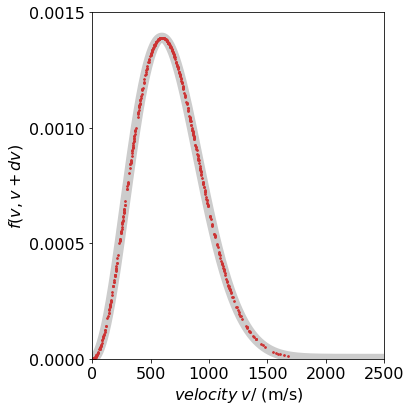

In [12]:
# kinetic energy metropolis from Maple

fig1= plt.figure(figsize=(6,6))
N =   1000                     # number of samples
fs= np.zeros(N,dtype=float)    # Maxwell probability f(s) 
fx= np.zeros(N,dtype=float)    # x value
deltax= 5000.0                 # max speed m /s
kB =    1.381e-23              # Boltzmann?s const J/K
T  =    300.0                  # temperature K
kBT= kB*T
amu=  1.6604e-27               # atomic mass unit kg
m  =  14.0*amu                 # N2 mass in kg
Etot = 0.0                     # initial energy <E> J
E2tot= 0.0                     # initial <E2>
Xtot = 0.0                     # initial value of total x
X2tot= 0.0                     # initial value of total x2
V= lambda x: 0.5*m*x**2        # kinetic energy

x1 = 1e-3                      # first guess of x  
E1 = V(x1)                     # first guess of PE
jj = 0                         # initial index Ps & Px
Pi = np.pi
g  = 4*Pi*(m/(2.0*Pi*kBT))**(3.0/2.0)        # weighting for fs.

for i in range(N):               # start loop step (2)
    x2 =  x1 + (np.random.ranf() - 0.5)*deltax     # new x position
    E2 = V(x2)                   # new PE
    DeltaE= E2 - E1              # energy difference
                                 # next line is Metropolis sampling
    if (DeltaE <= 0.0) or ((x2/x1)**2*np.exp(-DeltaE/kBT) > np.random.ranf()) :
        x1= x2                                # save new config'n
        E1= E2                                # save new energy
        fs[jj]= g*np.exp(-E1/kBT)*x1**2       # Maxwell probability
        fx[jj]= np.abs(x1)                    # make abs as only positive has any meaning physically
        jj= jj + 1
    pass
    Etot=  Etot  + E1             # always add to total
    E2tot= E2tot + E1**2          # add to total <E2>
    Xtot=  Xtot  + x1             # add to total <X>
    X2tot= X2tot + x1**2          # add to total <X2>
    pass                          # end loop

Eav    = Etot/N                   # average step (5)
E2av   = E2tot/N
Estdev = np.sqrt((E2av - Eav**2)/(N-1)) 
CV     = (E2av - Eav**2)/(kB*T**2)
print('{:s}\n{:12.4g}{:12.4g}{:12.4g}{:12.4g}  '.\
      format( 'av(E),     av(E^2),     stdev(E),   CV', Eav, E2av, Estdev, CV))
Xav = Xtot/N
X2av= X2tot/N
rt_mean_sqrX2 = np.sqrt(X2av)
Xstdev= np.sqrt((X2av-Xav**2)/(N-1))
print('\n{:s}\n{:12.4g}{:12.4g}{:12.4g}{:12.4g}'.\
      format( 'av(X),     av(X^2),     rms(x^2),  stdev(X)', Xav, X2av, rt_mean_sqrX2, Xstdev ))

xx = np.linspace(0, deltax,int(deltax)) 
plt.plot( g*np.exp( -V(xx)/kBT )*xx**2,color ='grey',linewidth=10,alpha=0.4)

mx= np.max(fs)
plt.scatter(fx[0:jj],fs[0:jj],color='red',s=3)

plt.xlabel(r'$velocity\; v $'+'/ (m/s)',fontsize=16)
plt.ylabel(r'$f(v,v+dv)$',fontsize=16)
plt.ylim( [0.0, mx*1.05] )
plt.xlim( [0, deltax/2.0] )
plt.yticks([0,0.0005,0.001,0.0015])
plt.tight_layout()

#plt.savefig('monte-carlo-fig12b.png')

plt.show()

In [145]:
# 1d Ising 
def binomialCoeff(n, k):    # from Rosetta   
    r = 1
    for i in range(1, k+1):
        r = r * (n - i + 1) / i
    return r
#-------------
def get_entropy(spin):
    p = 1               # start at 1 to get groups
    for i in range(L - 1):
        if spin[i+1] != spin[i] :
            p = p + 1
            pass
        pass
    #print(" entropy/(kB*N) ", np.log( binomialCoeff(N,p) ) /L )
    return np.log( binomialCoeff(L,p) ) /L 

#-----------------------
def Ising1D(beta):

    #L               # L sites
    #N               #  calcs / site
    #J               # positive J is ferromagnet
    #kB              # Boltzmann const, in a.u.
    #T               # temperature
    # beta = J/kBT
    rndi = np.random.randint(L,size = N)      # make list of random numbers 0 to n used as indices
    
    spin=  np.zeros(L,dtype=int)
    
    # deltaE can take values ( -4, 0, 4), however, only the
    # positive value is used in the metropolis test, hence we define 
    # probability P for the Metropolis test outside the loop.
    P = np.exp(-4.0*beta)     # prob’lty in Metropolis test.
    for i in range(L):
        spin[i] = -1              # initial distribution
    
    Enrg = -J*L                    # all spins aligned initially
    tot_Enrg = 0.0
    tot_Enrg2= 0.0
    tot_Mag = 0.0
    tot_Mag2=0.0
    for num in range(N):
        
        i = rndi[num]
        indx1 = i + 1 
        if indx1 > L-1 : indx1 = 0       # wrap around ends
        indx2 = i - 1 
        if indx2 < 0   : indx2 = L - 1
    
        DeltaE = 2.0*J*spin[i]*(spin[indx1] + spin[indx2])       # energy of  spin i + energy of adjacent spins
                                       
        if DeltaE <= 0.0 or np.random.ranf() < P :             # Metropolis test 
            spin[i] = -spin[i]                                  # flip spin
            Enrg = Enrg + DeltaE                               # add  energy 
        tot_Enrg = tot_Enrg  + Enrg
        tot_Enrg2= tot_Enrg2 + Enrg**2
        #tot_Mag  = tot_Mag+np.sum(spin)
        #tot_mag2 = tot_Mag2+np.dot(spin,spin)
        pass
    
    return tot_Enrg, tot_Enrg2, tot_Mag,tot_Mag2,spin
#------------

L = 500               # L sites
reps = 5000            # repeats
N = L*reps            # reps calcs / site
J = 1.0               # positive J is ferromagnet
kB= 1.0               # Boltzmann const, in a.u.
T = 2.0               # temperature

T_vals=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.25, 1.5,1.75, 2,3,4,5,6,7,8,9,10]
m=len(T_vals)
CV=np.zeros(m)
En=np.zeros(m)
S=np.zeros(m)
Mag=np.zeros(m)
Mag2=np.zeros(m)
chi=np.zeros(m)
for i,T in enumerate(T_vals):
    beta = J/(kB*T) 
    tot_Enrg, tot_Enrg2,tot_M,tot_M2, spin  = Ising1D(beta)

    avE  = (tot_Enrg/N)                                             # total N events
    avE2 = (tot_Enrg2/N)
    #print('temperature',T,'<Energy>',avE/L)
    #print('<Energy squared>',avE2)
    Cv = (1.0/(L*kB*T**2))*( tot_Enrg2/N - (tot_Enrg/N)**2 )          # <E^2> - <E>^2
    print(i,T,'Cv',Cv/kB)
    CV[i] = Cv/kB
    En[i] = avE/L
    S[i] = get_entropy(spin)
    Mag[i]=  np.sum(spin)
    Mag2[i]= np.dot(spin,spin)
    chi[i]= (Mag2[i]/L-(Mag[i]/L)**2)/(kB*T)
    pass


0 0.01 Cv 0.0
1 0.1 Cv 0.0
2 0.2 Cv 0.0
3 0.3 Cv 0.0001433021964557055
4 0.4 Cv 0.07783279860523179
5 0.5 Cv 0.27587842964893206
6 0.6 Cv 0.3554225572465738
7 0.7 Cv 0.4139753817935826
8 0.8 Cv 0.4280659602626655
9 0.9 Cv 0.4252122781984652
10 1.0 Cv 0.4504099549581297
11 1.25 Cv 0.37147057406712325
12 1.5 Cv 0.2955923105198243
13 1.75 Cv 0.24774946070747564
14 2 Cv 0.20212213844956206
15 3 Cv 0.10249351786099013
16 4 Cv 0.05943567605841872
17 5 Cv 0.038875605258247965
18 6 Cv 0.02720419997786323
19 7 Cv 0.02030162940079713
20 8 Cv 0.015590271993532738
21 9 Cv 0.012299302787779376
22 10 Cv 0.009879219974618929


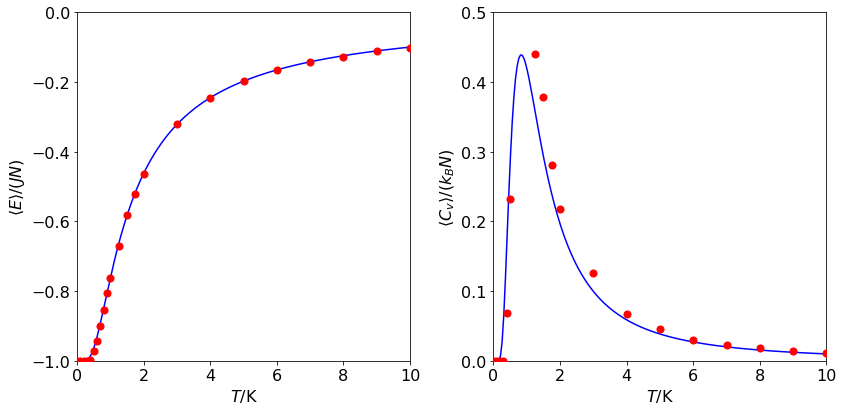

In [94]:
fig1=plt.figure(figsize=(12,6))
ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)
plt.rcParams.update({'font.size': 16})  # set font size for plots

ax0.scatter(T_vals,En,s=50,color='red',zorder=10)

x = np.linspace(1e-2,10,200)
En_exact = lambda T: -J*np.tanh(J/(kB*T))  # exact energy

ax0.plot(x,En_exact(x),color='blue')
ax0.set_ylim([-1,0])
ax0.set_xlim([0,T_vals[m-1]])
ax0.set_xlabel(r'$T$'+'/K')
ax0.set_ylabel(r'$\langle E\rangle /(JN)$')

ax1.scatter(T_vals,CV,s=50,color='red',zorder=10)

CV_exact= lambda T:  kB*(((2*J)/(kB*T)) * 1/ (np.exp(J/(kB*T)) + np.exp(-J/(kB*T)) )    )**2

ax1.plot(x,CV_exact(x)/kB,color='blue')

ax1.set_ylim([0,0.5])
ax1.set_xlim([0,T_vals[m-1]])
ax1.set_xlabel(r'$T$'+'/K')
ax1.set_ylabel(r'$\langle C_v\rangle /(k_BN)$')

plt.tight_layout()

#plt.savefig('monte-carlo-fig12f.png')

plt.show()

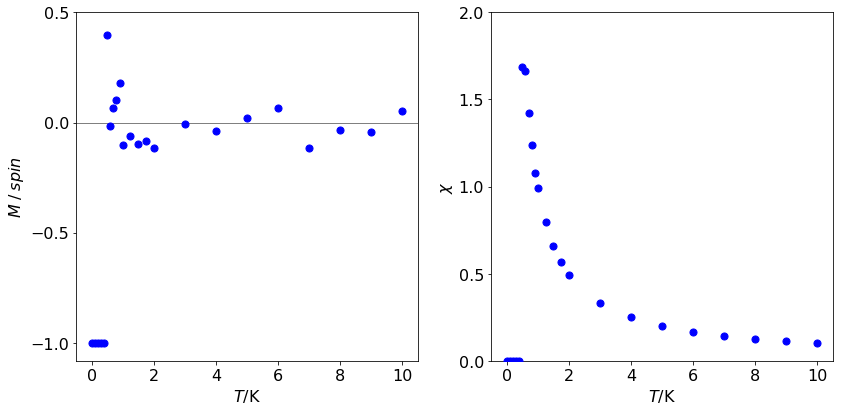

In [156]:
fig1=plt.figure(figsize=(12,6))
ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)
plt.rcParams.update({'font.size': 16})  # set font size for plots
ax0.scatter(T_vals,Mag/L,color='blue',s=50,zorder=10)
ax0.axhline(0,color='grey',linewidth=1)
ax0.set_ylabel(r'$M \;/ \;spin$')
ax0.set_xlabel(r'$T$'+'/K')
ax0.set_yticks([-1,-0.5,0.0,0.5])

ax1.scatter(T_vals,chi,color='blue',s=50,zorder=10)
ax1.set_ylabel(r'$\chi$')
ax1.set_xlabel(r'$T$'+'/K')
ax1.set_ylim([0,2])
ax1.set_yticks([0,0.5,1.0,1.5,2])


plt.tight_layout()

#plt.savefig('monte-carlo-fig12i.png')

plt.show()

/Users/godfrey/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/godfrey/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


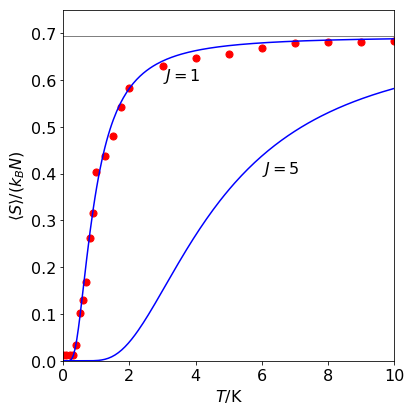

In [19]:
fig1=plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 16})  # set font size for plots
J=1
Ent = lambda T : kB*np.log(np.exp(2*J/(kB*T))+1 )- 2*J*np.exp(2*J/(kB*T))/(T*(np.exp(2*J/(kB*T))+1 ) )

x = np.linspace(1e-2,10,200)
plt.plot(x,Ent(x),color='blue')
J=5
plt.plot(x,Ent(x),color='blue')
plt.scatter(T_vals,S,s=50,color='red')
plt.axhline(kB*np.log(2),color='grey',linewidth=1)
plt.ylim([0,0.75])
plt.xlim([0,T_vals[m-1]])
plt.xlabel(r'$T$'+'/K')
plt.ylabel(r'$\langle S\rangle /(k_BN)$')
plt.annotate(r'$J=1$',xy=(3,0.6))
plt.annotate(r'$J=5$',xy=(6,0.4))
plt.tight_layout()

#plt.savefig('monte-carlo-fig12h.png')

plt.show()

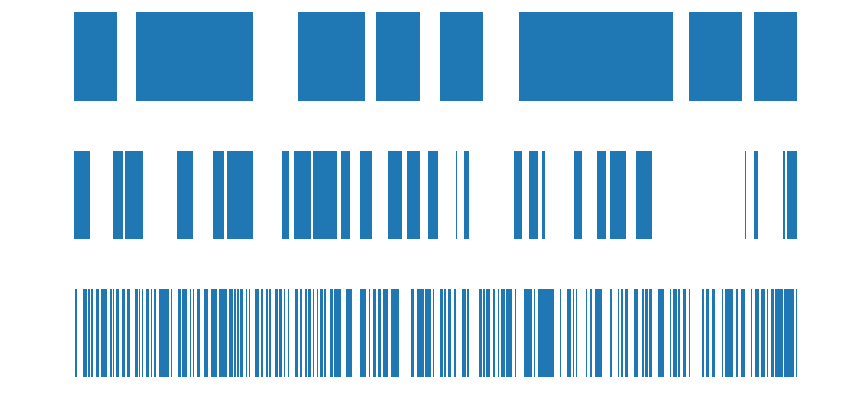

In [13]:
fig1=plt.figure(figsize=(12,6))
ax0 = fig1.add_subplot(3,1,1)
ax1 = fig1.add_subplot(3,1,2)
ax2 = fig1.add_subplot(3,1,3)
L = 500               # L sites
reps = 500            # repeats
N = L*reps            # reps calcs / site
J = 1.0               # positive J is ferromagnet
kB= 1.0              # Boltzmann const, in a.u.
T = 10.0               # temperature

def plot_it(ax,T):
    beta = J/(kB*T) 
    tot_Enrg, tot_Enrg2,spin  = Ising1d(beta)
    
    for i in range(L):
        if spin[i] > 0: spin[i]=0
    #print(spin[0:100])
    z= np.arange(L)
    ax.bar(z,spin,align='center',width=1.0)
    ax.axis('off')
ax=[ax0,ax1,ax2]

for i,T in enumerate( [0.5,1,10] ):
    plot_it(ax[i],T)
    
plt.tight_layout()

#plt.savefig('monte-carlo-fig12g.png')
    
plt.show()

In [19]:
# metropolos 2D ising spins



def ising2d(beta):
    
    rndi = np.random.randint(L,size = N)      # make list of random numbers 0 to L-1 used as indices
    rndk = np.random.randint(L,size = N)
    spin = np.zeros((L,L),dtype=int)          # spinlattice
    prob = np.zeros(8,dtype=float)            # array for exp(-deltaE/kBT)
    # 2*( -4,-2, 0, 2, 4) only positive used, 0 is checked for
    prob[3] = np.exp(-4.0*beta)               # all rest not used so are zero
    prob[7] = np.exp(-8.0*beta)
    
    for i in range(L):
        for k in range(L):
            spin[i,k]= 1                      # initial distribution T = 0
        pass
    
    Enrg = -2.0*n                              # energy when all spins are +1      
    tot_Enrg  = 0.0 
    tot_Enrg2 = 0.0 
    M = 0
    mag=0
    for num in range(N):                  # start calc
        i = rndi[num]  
        k = rndk[num]                     # choose random indices from list
        
        indx1 = i + 1                     # get adjacent site on right   
        if indx1 > L - 1: indx1 = 0       # if right boundary  go to left-most
        
        indx2 = i - 1                     # adjacent left 
        if indx2 < 0:     indx2 = L - 1   # if left boundary  go to right-most
  
        indx3 = k + 1                     # adjacent above
        if indx3 > L - 1: indx3 = 0       # if top  go to bottom
            
        indx4 = k - 1                     # adjacent below
        if indx4 < 0:     indx4 = L - 1   # if bottom  go to top
 
        sum_nn = spin[indx1,k] + spin[indx2,k] + spin[i,indx3] + spin[i,indx4] 
        DeltaE = 2*spin[i,k]*sum_nn          # # -2*old value*( -J )*neigbours 
        
        if DeltaE <= 0 or np.random.ranf() < prob[DeltaE-1] :  # Metropolis test
            spin[i,k]= -spin[i,k]            # flip spin
            Enrg = Enrg + DeltaE             # increment
            #mag = mag +2*spin[i,k]
            pass 
        tot_Enrg = tot_Enrg + Enrg           # energy
        tot_Enrg2= tot_Enrg2 + Enrg**2       # energy2
        if num > N-10000:
            M = M + (np.sum(spin))
        pass

    return  tot_Enrg, tot_Enrg2, M,spin

L  = 16           # side
n  = L**2
N  = n*25*10**3   # integer  use 10**3 for pics
J  = 1.0
kB = 1.0
print(L,n,N,J,kB)

#T = np.linspace(0,5,num,dtype=float)

T = [0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5]
num = len(T)
CV = np.zeros(num,dtype=float)
Mag= np.zeros(num,dtype=float)

for i in range(1,num):
    beta = J/( kB*T[i] )
    tot_E,tot_E2,tot_M,spin = ising2d(beta)
    
    Cv  = beta**2*( tot_E2/N - tot_E**2/N**2)/n

    print('{:f} {:f} {:f} {:f} {:f}'.format( T[i],tot_E/(N*n),tot_E2/(N*n),Cv,np.abs(tot_M /(10000*n)  ) ))
    CV[i]= Cv
    Mag[i]= np.abs(tot_M/(10000*n))
    pass
print('finished')

16 256 6400000 1.0 1.0
0.250000 -2.000000 1024.000000 0.000000 0.999900
0.500000 -2.000000 1024.000000 0.000000 0.999900
0.750000 -1.999787 1023.783960 0.003029 0.999900
1.000000 -1.997123 1021.079272 0.023640 0.999773
1.250000 -1.984661 1008.485064 0.084644 0.996916
1.500000 -1.951243 975.126264 0.197495 0.986180
1.750000 -1.879550 905.587001 0.396268 0.962230
2.000000 -1.744038 781.614294 0.736758 0.915848
2.100000 -1.661918 711.278175 0.955389 0.904091
2.200000 -1.545899 618.385152 1.362645 0.865524
2.300000 -1.406590 514.487871 1.510914 0.753545
2.400000 -1.252550 409.629062 1.388128 0.095179
2.500000 -1.132743 335.203386 1.076457 0.420713
2.600000 -1.036155 280.226428 0.795938 0.562040
2.700000 -0.969905 245.563514 0.650248 0.276877
2.800000 -0.908732 215.533982 0.526882 0.124824
2.900000 -0.861695 194.016747 0.467552 0.064605
3.000000 -0.817605 174.805517 0.408361 0.050668
3.250000 -0.728388 139.038215 0.304645 0.145362
3.500000 -0.659567 114.399955 0.247558 0.027373
3.750000 -0.

TypeError: 'int' object is not subscriptable

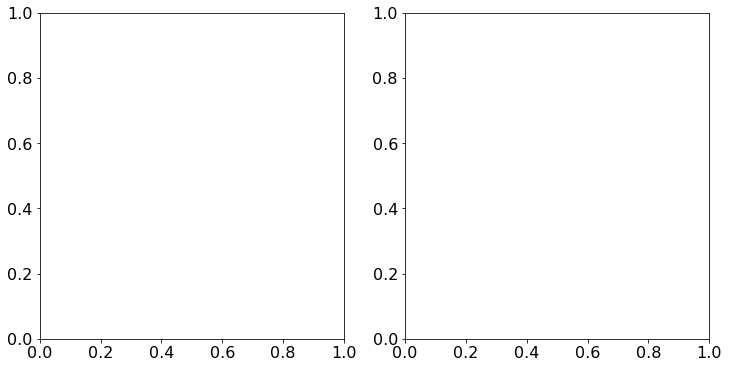

In [24]:
fig1=plt.figure(figsize=(12,6))
ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)
plt.rcParams.update({'font.size': 16})  # set font size for plots


ax0.plot(T[:],CV[:],color='grey')
ax0.scatter(T[:],CV[:],color='red',s=50)
ax0.set_xlim([0,5])
ax0.set_ylim([0,2])
ax0.set_xlabel(r'$k_BT$')
ax0.set_ylabel(r'$C_V$')
ax0.set_yticks([0,0.5,1,1.5,2])

M = lambda beta : (1.0 - np.sinh(2/beta)**(-4)  )**(1/8)

Tc = 2.0/np.log(1+np.sqrt(2)) - 1e-12
beta = np.linspace(1e-3,Tc,1000)
ax1.plot(beta,M(beta) ,color='blue')
Mag[0]=Mag[1]
ax1.scatter(T,Mag,color='red',s=50)
ax1.set_ylim([0,1])
ax1.set_xlim([0,5])
ax1.set_xlabel(r'$k_BT$')
ax1.set_ylabel(r'$M$')

plt.tight_layout()

#plt.savefig('monte-carlo-fig14.png')

plt.show()

In [25]:
T

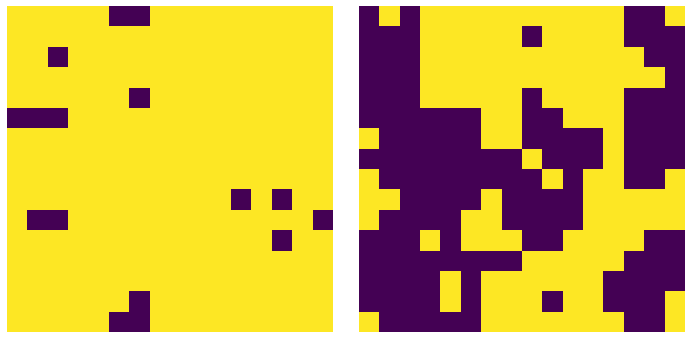

In [27]:
fig1=plt.figure(figsize=(10,5))
ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)
plt.rcParams.update({'font.size': 16})

colm = plt.cm.viridis

L  = 16           # side
n  = L**2
N  = n*25*10**1   # integer  
J  = 1.0
kB = 1.0
T=2
beta = J/(kB*T)
tot_E, tot_E2, tot_M, spin = ising2d(beta)

ax0.imshow(spin, aspect=1, cmap=colm,interpolation='none',origin='lower')
ax0.axis('off')


T=3
beta = J/(kB*T)
tot_E, tot_E2, tot_M, spin = ising2d(beta)
aa=ax1.imshow(spin, aspect=1, cmap=colm,interpolation='none',origin='lower')
ax1.axis('off')

plt.tight_layout()

#plt.savefig('monte-carlo-fig12.png')

plt.show()

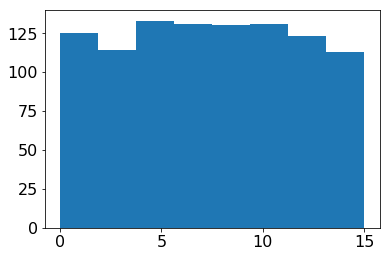

In [96]:
plt.hist(np.random.randint(L,size=1000),bins=8 )
plt.show()

/var/folders/gn/whk4pp2x4kz_ftg0b1ycmh340000gn/T/ipykernel_3701/1321452208.py:1: RuntimeWarning: divide by zero encountered in true_divide
  M = lambda beta : (1.0 - np.sinh(2/beta)**(-4) )**(1/8)
/var/folders/gn/whk4pp2x4kz_ftg0b1ycmh340000gn/T/ipykernel_3701/1321452208.py:1: RuntimeWarning: overflow encountered in sinh
  M = lambda beta : (1.0 - np.sinh(2/beta)**(-4) )**(1/8)


ValueError: x and y must be the same size

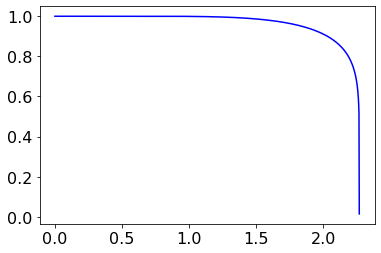

In [22]:
M = lambda beta : (1.0 - np.sinh(2/beta)**(-4) )**(1/8)

Tc = 2.0/np.log(1+np.sqrt(2))-1e-15
beta = np.linspace(0,Tc,1000)
plt.plot(beta,M(beta) ,color='blue')
plt.scatter(T,Mag,color='red',s=50)
plt.ylim([0,1])
plt.xlim([0,5])
plt.show()

In [9]:
np.linspace(0,5,21,dtype=float)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ])

In [409]:
N  = n*25*10**1
kBT=2
beta =J/kBT
energy, energy2, CV,magn= ising2d(beta)

print('{:f} {:f} {:f} {:f} {:f}'.format( kBT,energy,energy2,CV,magn) )

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
for i,val in enumerate([-8,-4,0,4,8] ):
    print(i,val)

In [21]:
L//2-1

7

In [4]:
np.random.randint(1,5,size = 100)

array([2, 4, 3, 2, 2, 3, 3, 1, 4, 2, 2, 3, 1, 2, 3, 2, 4, 1, 4, 3, 1, 4,
       4, 4, 2, 3, 2, 1, 3, 4, 4, 2, 4, 3, 4, 1, 4, 4, 4, 2, 3, 3, 4, 2,
       3, 3, 1, 2, 2, 3, 2, 4, 1, 1, 1, 2, 2, 3, 2, 2, 3, 3, 4, 1, 3, 1,
       2, 1, 4, 3, 3, 1, 2, 4, 4, 4, 2, 1, 4, 3, 4, 4, 2, 3, 3, 3, 4, 4,
       4, 2, 1, 2, 3, 1, 3, 4, 2, 2, 1, 4])

In [ ]:
# algorithm 10 Forster transfer 



kf= 1/10.0                                      # 10 ns lifetime
c = 0.002                                       # conc mol/dm3
R0= 3.0                                         # R0 in nm
d = 8.0                                         # sphere radius d*R0
Avog= 6.023e23/1e24                             # num molecs / nm3
n = int(np.round( c*Avog*4/3*np.pi*(d*R0)**3) ) # integer number molecs
Rmax= (2/3)*kf*(R0/1)**6                        # maximum rate
reps= 20000                                     # repeat calc’n
bins= 150                                       # size of histogram
maxt= 50.0                                      # maximum time
Acount= np.zeros(bins,dtype=int)                # define arrays
dtime = np.zeros(bins,dtype=float) 


print(n,Rmax)
for i in range(bins):
    dtime[i]= i*maxt/bins 

s = 0.6667*kf/d**6                              # constants for rate 
for k in range( reps):                          # start calc loop
    a0 = kf                                     # fluorescence rate
    for i in range(n):
        x = np.random.ranf() - 0.5              # choose acceptors
        y = np.random.ranf() - 0.5              # x,y,z coordinates
        z = np.random.ranf() - 0.5 
        rate = s/(x**2 + y**2 + z**2)**3        # 2/3*kf*(R0/R)**6
        if rate > Rmax :  rate = Rmax
        a0 = a0 + rate                          # sum rate
        pass
    t = -np.log( np.random.ranf() )/a0          # calc time eqn (12.11)
    indx = int(np.round(t*bins/maxt) )          # make index
    if indx < bins-1 :
        Acount[indx]= Acount[indx] + 1          # histogram
        pass
    pass                                        # end reps loop

1522.3 1.25


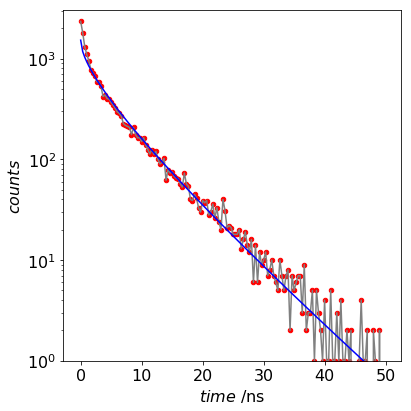

In [231]:
fig1= plt.figure(figsize=(6,6))

plt.plot(dtime,Acount,color='grey')
plt.scatter(dtime,Acount,s=20,color='red')
plt.yscale('log')
plt.ylabel(r'$counts$')
plt.xlabel(r'$time $'+' /ns')
plt.ylim([1,1.3*max(Acount)])

alpha = 1.25
a  = max(Acount)*0.65

ket= lambda t, a, alpha: a*np.exp(-kf*t-alpha*np.sqrt(kf*t)) 

#p3, pcov = curve_fit( ket, dtime, Acount, p0 = [ max(Acount), 1.5  ] )

print(a,alpha)
plt.plot(dtime,ket(dtime,a,alpha),color='blue'  )

plt.tight_layout()

#plt.savefig('monte-carlo-fig16.png')

plt.show()

In [12]:
# P[,]>= 1 = A molecs, 2 = B molecs, 0 = impurity.

n    = 20                                #size of grid side
reps = 200                               #repeat calc’n
fract= 0.0                               #initial fraction impurity
num_fract = 20                           #number of fractions calc’d
delta_fract= 0.05                        #increment fraction
data = np.zeros(num_fract,dtype=float)   #array for results
fdata= np.zeros(num_fract,dtype=float)   #  fractions
Mat  = np.zeros((n+2,n+2,4),dtype=int)   # n+2 values, index runs from 0->n+1

for L in range(num_fract):               # fraction loop to end
    asum = 0 
    for k in range(reps):                # repeat loop
        P = np.zeros((n+2,n+2),dtype = int)  #matrix of molecs/ trees
        for i in range(1,n+1)   :
            for j in range(1,n+1): 
                P[i,j]= 1                # fill matrix leave border could 
                pass
            pass
       
        fn = int(np.trunc(fract*n*n) )   # make into integer
        # part b make fraction of impurities
        num = 0
        while num < fn :                 #exactly fract impurity
            ra = np.random.randint(1,n+1) 
            rb = np.random.randint(1,n+1)
            if P[ra,rb] != 0:
                P[ra,rb] = 0 
                num = num + 1 
                pass
            pass
        num = 0
        # choose one type B molecule
        while num < 1 : 
            ra = np.random.randint(1,n+1)    # in range 1 to n+1
            rb = np.random.randint(1,n+1)  
            if P[ra,rb] == 1 :
                P[ra,rb] = 2
                num = 1 
                pass
            pass 
        # part c main calculation starts ###
        b = -1 
        c = 0
        while c > b :                        # check if calc ended
            b = c                            # store old value in b 
            c = 0                            # reset c
            for i in range(1,n+1):
                for j in range(1,n+1):
                    if P[i,j] == 2 :             # search array
                        if P[i,j-1] == 1  : P[i,j-1] = 2 
                        if P[i,j+1] == 1  : P[i,j+1] = 2 
                        if P[i-1,j] == 1  : P[i-1,j] = 2 
                        if P[i+1,j] == 1  : P[i+1,j] = 2 
                        c = c + 1
                        pass
            pass                       # end while
        asum = asum + c
        pass                           # end reps
    # make results
    av = asum/reps
    fdata[L] = fract*100 
    data[L]  = av/n**2*100.0 
    fract    = fract + delta_fract 
    print('results',L, fdata[L],data[L])
    if np.round(fdata[L])== 10: Mat[:,:,0]=P[:,:]
    if np.round(fdata[L])== 30: Mat[:,:,1]=P[:,:]
    if np.round(fdata[L])== 50: Mat[:,:,2]=P[:,:]
    if np.round(fdata[L])== 70: Mat[:,:,3]=P[:,:]
    pass                               # end L loop
print('finished')
print(fdata)
print(data)

results 0 0.0 100.0
results 1 5.0 94.99375
results 2 10.0 89.955
results 3 15.000000000000002 84.38625
results 4 20.0 79.13875
results 5 25.0 70.7325
results 6 30.0 62.14999999999999
results 7 35.0 47.38
results 8 40.0 28.08
results 9 44.99999999999999 13.643750000000002
results 10 49.99999999999999 7.276250000000001
results 11 54.99999999999999 3.9012499999999997
results 12 60.0 2.15
results 13 65.0 1.51625
results 14 70.0 1.0125
results 15 75.00000000000001 0.76625
results 16 80.00000000000001 0.62375
results 17 85.00000000000001 0.51
results 18 90.00000000000003 0.3775
results 19 95.00000000000003 0.28875
finished
[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.
 90. 95.]
[100.       94.99375  89.955    84.38625  79.13875  70.7325   62.15
  47.38     28.08     13.64375   7.27625   3.90125   2.15      1.51625
   1.0125    0.76625   0.62375   0.51      0.3775    0.28875]


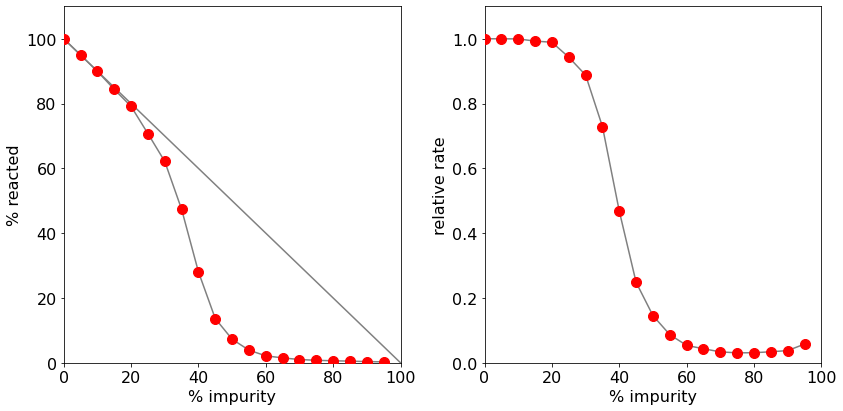

In [14]:
fig1= plt.figure(figsize=(12,6))
ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)
plt.rcParams.update({'font.size': 16})


ax0.scatter(fdata,data,s=100,color='red',zorder=10)
ax0.plot(fdata,data,color='grey',zorder=0)

ax0.plot([0,100],[100,0],color='grey')
ax0.set_xlim([0,100])
ax0.set_ylim([0,110])
ax0.set_xlabel('% impurity')
ax0.set_ylabel('% reacted')


ax1.scatter(fdata,data/(100.0-fdata),s=100,color='red',zorder=10)
ax1.plot(fdata, data/(100.0-fdata) ,color='grey',zorder=0)
ax1.set_xlim([0,100])
ax1.set_ylim([0,1.1])
ax1.set_xlabel('% impurity')
ax1.set_ylabel('relative rate')

plt.tight_layout()

#plt.savefig('monte-carlo-fig18.png')


plt.show()

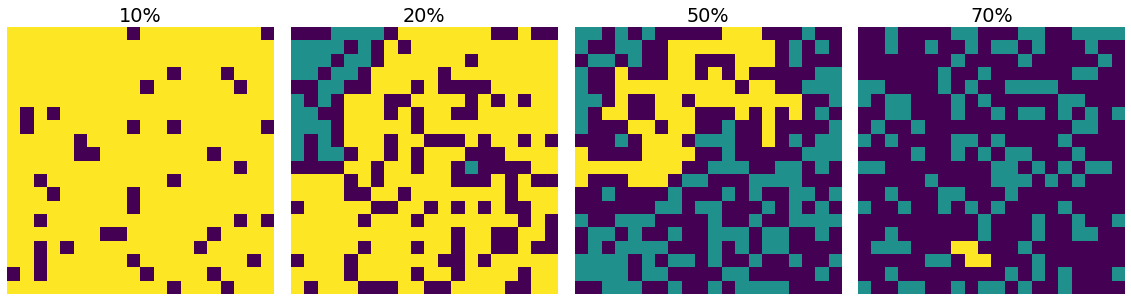

In [16]:
fig1= plt.figure(figsize=(16,10))
ax0 = fig1.add_subplot(1,4,1)
ax1 = fig1.add_subplot(1,4,2)
ax2 = fig1.add_subplot(1,4,3)
ax3 = fig1.add_subplot(1,4,4)
plt.rcParams.update({'font.size': 16})

ax_num=[ax0,ax1,ax2,ax3]
labl=[10,20,50,70]
for i,ax in enumerate(ax_num):
    ax.imshow(Mat[1:n+1,1:n+1,i], aspect=1, interpolation='none',origin='lower')
    ax.axis('off')
    ax.set_title(str(labl[i])+'%')

plt.tight_layout()    
#plt.savefig('monte-carlo-fig19.png')   
plt.show()

In [293]:
np.random.randint(1,n+1,200)

array([20, 10,  9,  6, 20,  2, 18, 10, 14,  8, 13, 15,  3, 16,  1,  4,  9,
       14, 12, 19, 12, 19, 10, 20, 10, 16,  9,  9, 14, 20, 15, 13, 20, 14,
       16, 16, 17,  4, 18,  5, 16, 10, 13, 14, 10, 19, 19, 12,  5,  4,  4,
        6, 16,  1, 17, 14, 10, 13,  1,  1, 19, 10,  4,  2,  1, 14,  9, 20,
       15,  6, 20, 20, 13, 19,  6, 15, 20, 13, 13, 16, 11, 20, 12, 13,  9,
       11, 13,  3, 20,  3,  2, 15,  2,  2, 19, 17,  3,  6, 15,  6, 14, 13,
        5, 13,  1,  4, 13, 19,  6,  7,  3,  6, 17,  3,  2,  8, 16, 14,  3,
        6, 18, 17,  7, 12, 14,  1,  8, 17, 17,  3, 11,  7, 14, 10, 14,  8,
        7,  7,  9,  7,  2, 19, 10, 14, 20,  9,  2,  5, 11,  4, 14, 13, 13,
        7, 17,  7,  2,  9,  6,  2, 18, 17, 12,  7, 10, 11, 14, 11, 13, 20,
        4,  3,  3,  1,  2,  1, 17, 13,  1, 16, 19, 14,  9, 17, 18, 14,  7,
        1,  5, 18, 14, 16,  6,  9, 13, 14, 20,  8,  1, 12])

In [289]:
n

20

In [311]:
[i for i in range(6)]

[0, 1, 2, 3, 4, 5]

In [319]:
P = np.zeros((n+2,n+2),dtype = float)  #matrix of molecs/ trees
for i in range(1,n+1)   :
    for j in range(1,n+1): 
        P[i,j]= 1              # fill matrix leave border
print(P)                

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [40]:
x = symbols('x')
f=sin(1*pi*x)*sin(2*pi*x)
ans=integrate(f,(x,-10,10 ) )
ans

In [2]:
aa=np.zeros(5)

array([0., 0., 0., 0., 0.])

In [13]:
# DNA 

beta= 7.0
d   = 0.34
kf  = 10**(-3)/380.0
k0  = 3.0
nb  = 12+1
dye=( nb-1 )/2 + 1
reps= 500000
maxt= 1000.0
bins= 1000
DNA= np.zeros(nb,dtype=int )
Acount= np.zeros(bins,dtype=int)
dtime= np.zeros(bins,dtype=float)
for i in range( bins ):# set arrays
    dtime[i]= i*maxt/bins 
    pass
for j in range(reps):
    for i in range(nb): # G into DNA if rand > 3 
        if 4*np.random.ranf() > 3:
            DNA[i] = 1 
        else:
            DNA[i] = 0        # base G has value 1
        pass
    
    a0 = kf 
    for i in range(nb) :      #look for Gdye = 6 for 10 bases
        if DNA[i]==1 and i != dye :
            a0= a0 + k0*np.exp(-beta*abs(i-dye)*d)  # total rate
            pass 
        pass
    t = -np.log( np.random.ranf() )/ a0
    indx = int(np.round(t*bins/maxt))
    # equation (12.13)
    # make into index
    if indx < bins -1:
        Acount[indx+1]= Acount[indx+1] + 1  # make histogram
        pass 
    pass  # end reps 

print('finished')

finished


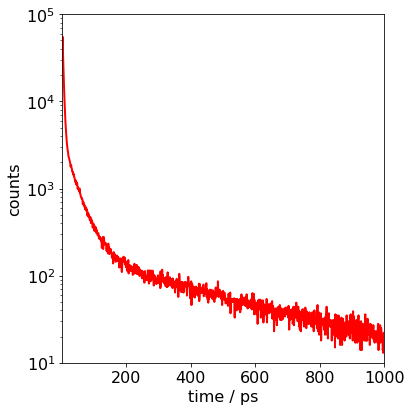

In [15]:

fig1= plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 16})

Acount[0]=Acount[1]
plt.plot(dtime,Acount,color='red',linewidth=2)
plt.yscale('log')
#plt.xscale('log')
plt.ylim([10,1e5])
plt.xlim([1,maxt])
plt.ylabel('counts')
plt.xlabel('time / ps')
plt.tight_layout()

#plt.savefig('monte-carlo-fig26.png')

plt.show()

In [9]:
#Q 12: 16b SIR simulation
# P[]= 0 = Immune, 1 = susceptible,  2= Infected.

nums  = 1000                    # number of people
fract = 0.01                    # initially immune
recovr= 0.2                     # chance recovery / day
num_infect=1                    # number infected / day
numd = 50                       # number of  days
reps = 40
data = np.zeros(numd,dtype=int) # array for infected
sdata= np.zeros(numd,dtype=int) # array for susceptibles
P = np.zeros(nums,dtype=float)  # student array to zero   
remov = 0                       # number removed 
for k in range( reps):          # loop for repeat calc’n     
    #set up P array with values 0,1 and 2
    
    for i in range(nums):
        P[i] = 1                        # initially all susceptible
    fn= int(np.round(fract*nums) )      # make into integer
    n = 0
    while n < fn:                       # exact fract*nums immune
        ra = np.random.randint(0,nums)  # choose rand num= 0 to nums-1
        if P[ra] != 0:
            P[ra] = 0
            n = n + 1
            pass
        pass
    n = 0
    while n < 1:                        #1 infected not one of immune
        ra = np.random.randint(0,nums)
        if P[ra] == 1:
            P[ra] = 2 
            n = 1
            pass
        pass

    # The main part of the calculation follows 
    for j in range(numd):                         # loop over days 
        for i in range(nums):                     # loop students 
            if P[i] == 2:                         # spread infection
                for ii in range(num_infect):
                    ra = np.random.randint(0,nums)# infect new stdnt
                    if P[ra]== 1:
                        P[ra] = 2 
                        remov = remov + 1
                        pass
                    pass                          # end for ii
                pass                              # end if
            if np.random.ranf() < recovr:         # chance of recovery
                ra = np.random.randint(1,nums)
                if P[ra] == 2:  P[ra]= 0
                pass
            pass                                  # end for i
        c = 0 
        s = 0
        for i in range(nums):                     # find num infected 
            if P[i]== 2: c = c + 1
            if P[i]== 1: s = s + 1
            pass
        data[j]= data[j] + c                      # number infected 
        sdata[j]= sdata[j]+ s                     # number suscept
        pass                                      # end for j 
    pass                                          # end for reps 
num_infected = int(remov/reps)                         # number infected
print('finished, num infected',num_infected)

finished, num infected 908


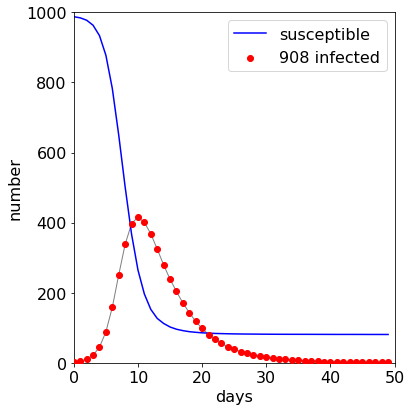

In [11]:
fig1= plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 16})

days=np.zeros(numd,dtype=int)
for i in range(numd): days[i]=i
plt.scatter(days,data/reps,color='red',label=str(num_infected)+' infected',zorder=10)
plt.plot(days,data/reps,color='grey',linewidth=1)
plt.plot(days,sdata/reps,color='blue',label='susceptible')

plt.xlim([0,numd])
plt.ylim([0,nums])

plt.ylabel('number')
plt.xlabel('days')
plt.legend()

plt.tight_layout()
#plt.savefig('monte-carlo-fig27.png')

plt.show()

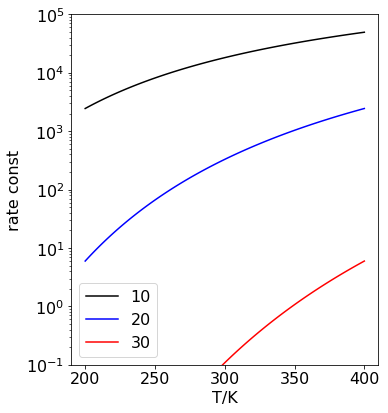

In [52]:
fig1= plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 16})

k = lambda T,Ea : np.exp(-Ea*1000/(R*T))

R = 8.314

T = np.linspace(200,400,100)
plt.plot(T,1e6*k(T,10),color='black',label='10')
plt.plot(T,1e6*k(T,20),color='blue',label='20')
plt.plot(T,1e6*k(T,40),color='red',label='30')
plt.ylim([0.1,1e5])
plt.ylabel('rate const')
plt.xlabel('T/K')
plt.legend()
plt.tight_layout()
plt.yscale('log')
#plt.savefig('arrhenius-temp.png')
plt.show()